<a href="https://colab.research.google.com/github/zamborg/deepGenProj/blob/main/metrics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Toxic Chat

In [72]:
# upload csvs

from google.colab import files
uploaded = files.upload()
uploaded = files.upload()
uploaded = files.upload()

Saving toxic_chat_scores.csv to toxic_chat_scores.csv


In [73]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score

df_main = pd.read_csv('Toxicity Evaluation.csv')
df_toxic_chat = pd.read_csv('toxic_chat_scores.csv')
df_toxic_users = pd.read_csv('toxic_chat_users.csv')

y_true_user = df_toxic_users['toxicity']
y_true_user = y_true_user.apply(lambda x: float(x[1:-1]))
print('mean', y_true_user.mean(axis=0))
y_true_user = y_true_user.apply(lambda x: 1 if x>=y_true_user.mean(axis=0) else 0)

y_pred_user = df_main['user_input']


y_true_model = df_toxic_chat['toxicity']
y_true_model = y_true_model.apply(lambda x: float(x[1:-1]))
print('mean', y_true_model.mean(axis=0))
y_true_model = y_true_model.apply(lambda x: 1 if x>=y_true_model.mean(axis=0) else 0)

y_pred_model = df_main['model_output']


mean 0.023188868361630945
mean 0.0096959019213055


In [74]:
print(y_pred_user)

0        0
1        0
2        1
3        0
4        1
        ..
10160    0
10161    0
10162    0
10163    0
10164    0
Name: user_input, Length: 10165, dtype: int64


In [75]:
print(y_true_user)

0        1
1        0
2        0
3        0
4        0
        ..
10160    0
10161    0
10162    0
10163    0
10164    0
Name: toxicity, Length: 10165, dtype: int64


In [76]:
# USER

y_true = y_true_user
y_pred = y_pred_user

print()

# Calculate metrics
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
auprc = average_precision_score(y_true, y_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUPRC:", auprc)


Precision: 0.46629986244841815
Recall: 0.3676789587852495
F1 Score: 0.41115827774408736
AUPRC: 0.22880231244190913


In [77]:
# MODEL

y_true = y_true_model
y_pred = y_pred_model

# Calculate metrics
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)
auprc = average_precision_score(y_true, y_pred)

# Print the results
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUPRC:", auprc)

Precision: 0.47780678851174935
Recall: 0.22761194029850745
F1 Score: 0.3083403538331929
AUPRC: 0.1698465125131369


## Toxicity

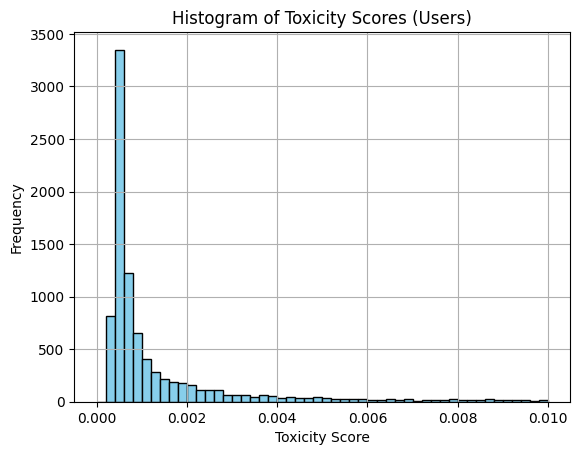

In [78]:
import matplotlib.pyplot as plt

y_true_user = df_toxic_users['toxicity']
y_true_user = y_true_user.apply(lambda x: float(x[1:-1]))

y_true_user.plot(kind='hist', range=(0, 0.01), bins=50, color='skyblue', edgecolor='black')

plt.title('Histogram of Toxicity Scores (Users)')
plt.xlabel('Toxicity Score')
plt.ylabel('Frequency')
plt.grid(True)


plt.show()

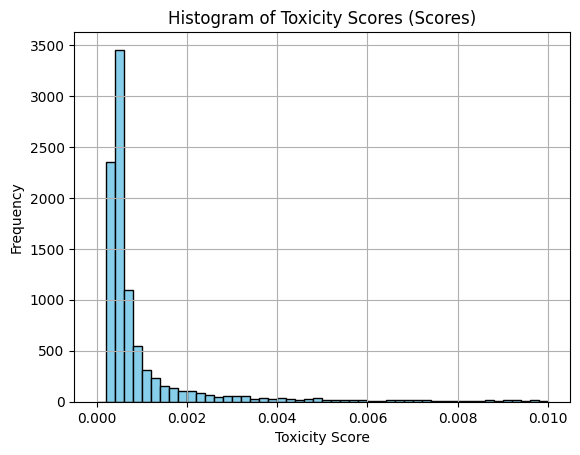

In [79]:
y_true_scores = df_toxic_chat['toxicity']
y_true_scores = y_true_scores.apply(lambda x: float(x[1:-1]))

y_true_scores.plot(kind='hist', range=(0, 0.01), bins=50, color='skyblue', edgecolor='black')

plt.title('Histogram of Toxicity Scores (Scores)')
plt.xlabel('Toxicity Score')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

## Severe toxicity

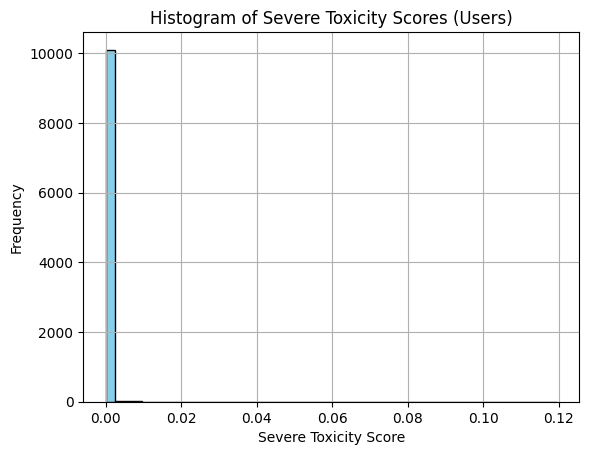

In [80]:
y_true_user = df_toxic_users['severe_toxicity']
y_true_user = y_true_user.apply(lambda x: float(x[1:-1]))

y_true_user.plot(kind='hist', bins=50, color='skyblue', edgecolor='black')

plt.title('Histogram of Severe Toxicity Scores (Users)')
plt.xlabel('Severe Toxicity Score')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

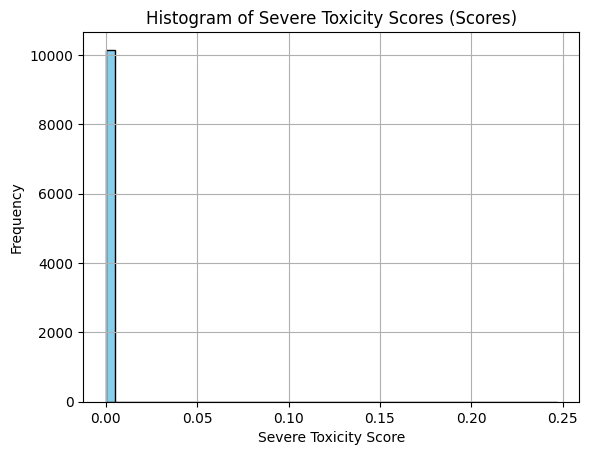

In [81]:
y_true_scores = df_toxic_chat['severe_toxicity']
y_true_scores = y_true_scores.apply(lambda x: float(x[1:-1]))

y_true_scores.plot(kind='hist', bins=50, color='skyblue', edgecolor='black')

plt.title('Histogram of Severe Toxicity Scores (Scores)')
plt.xlabel('Severe Toxicity Score')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

## Obscene

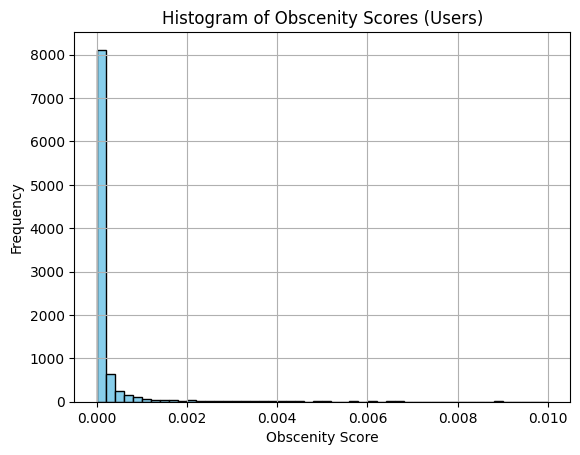

In [82]:
y_true_user = df_toxic_users['obscene']
y_true_user = y_true_user.apply(lambda x: float(x[1:-1]))

y_true_user.plot(kind='hist', range=(0, 0.01), bins=50, color='skyblue', edgecolor='black')

plt.title('Histogram of Obscenity Scores (Users)')
plt.xlabel('Obscenity Score')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

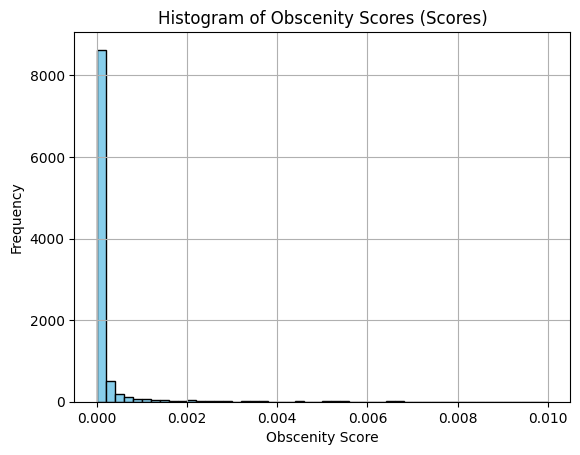

In [83]:
y_true_scores = df_toxic_chat['obscene']
y_true_scores = y_true_scores.apply(lambda x: float(x[1:-1]))

y_true_scores.plot(kind='hist', range=(0, 0.01), bins=50, color='skyblue', edgecolor='black')

plt.title('Histogram of Obscenity Scores (Scores)')
plt.xlabel('Obscenity Score')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

## Identity Attack

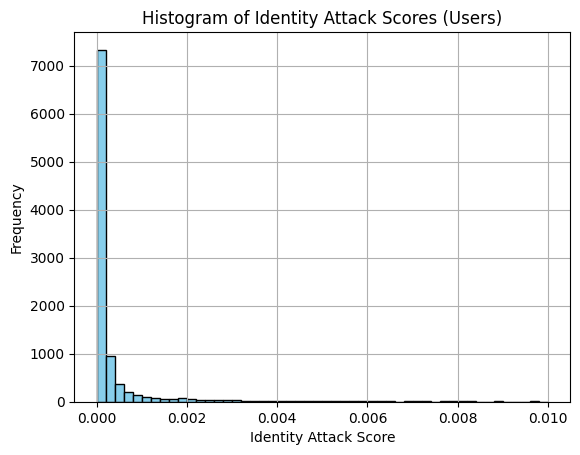

In [84]:
y_true_user = df_toxic_users['identity_attack']
y_true_user = y_true_user.apply(lambda x: float(x[1:-1]))

y_true_user.plot(kind='hist', bins=50, range=(0, 0.01), color='skyblue', edgecolor='black')

plt.title('Histogram of Identity Attack Scores (Users)')
plt.xlabel('Identity Attack Score')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

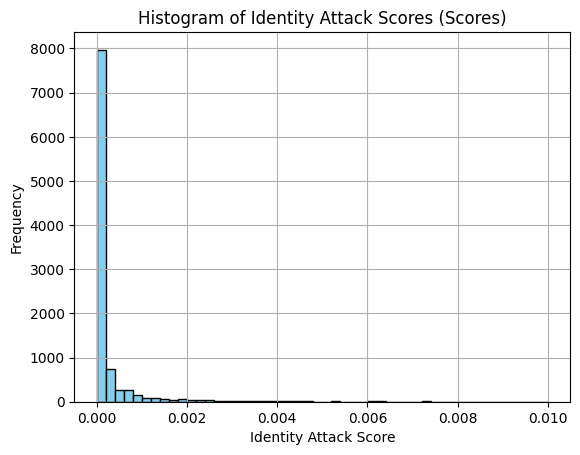

In [85]:
y_true_scores = df_toxic_chat['identity_attack']
y_true_scores = y_true_scores.apply(lambda x: float(x[1:-1]))

y_true_scores.plot(kind='hist', bins=50, range=(0, 0.01), color='skyblue', edgecolor='black')

plt.title('Histogram of Identity Attack Scores (Scores)')
plt.xlabel('Identity Attack Score')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

## Insult

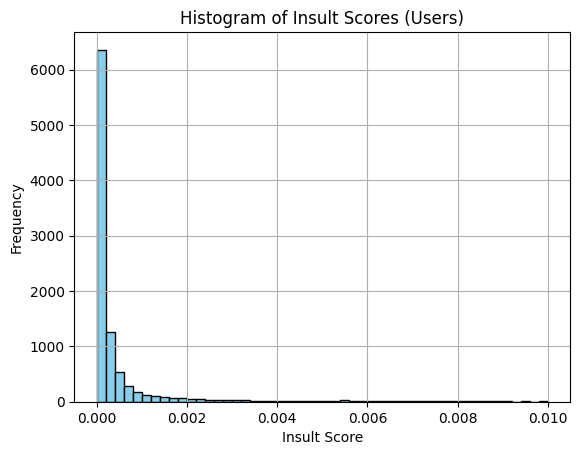

In [86]:
y_true_user = df_toxic_users['insult']
y_true_user = y_true_user.apply(lambda x: float(x[1:-1]))

y_true_user.plot(kind='hist', range=(0, 0.01), bins=50, color='skyblue', edgecolor='black')

plt.title('Histogram of Insult Scores (Users)')
plt.xlabel('Insult Score')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

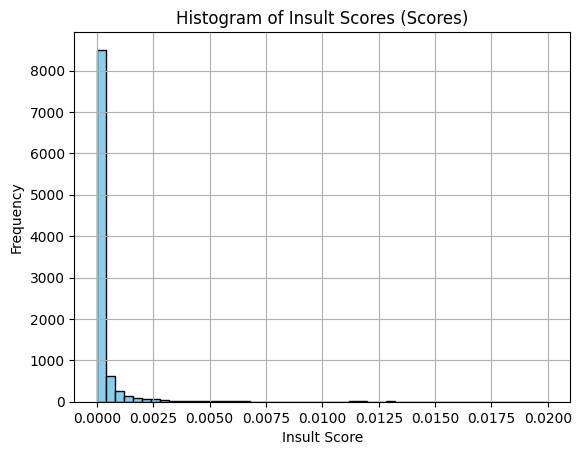

In [87]:
y_true_scores = df_toxic_chat['insult']
y_true_scores = y_true_scores.apply(lambda x: float(x[1:-1]))

y_true_scores.plot(kind='hist', bins=50, range=(0, 0.02), color='skyblue', edgecolor='black')

plt.title('Histogram of Insult Scores (Scores)')
plt.xlabel('Insult Score')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

## Threat

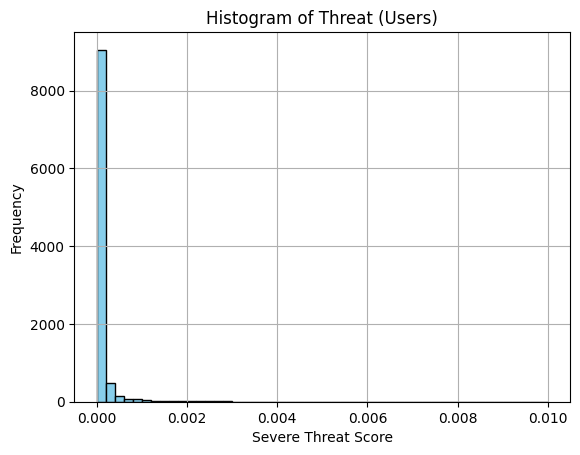

In [88]:
y_true_user = df_toxic_users['threat']
y_true_user = y_true_user.apply(lambda x: float(x[1:-1]))

y_true_user.plot(kind='hist', bins=50, range=(0, 0.01), color='skyblue', edgecolor='black')

plt.title('Histogram of Threat (Users)')
plt.xlabel('Severe Threat Score')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

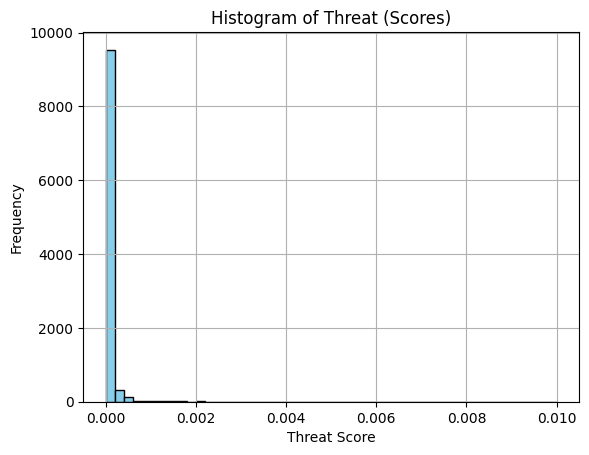

In [89]:
y_true_scores = df_toxic_chat['threat']
y_true_scores = y_true_scores.apply(lambda x: float(x[1:-1]))

y_true_scores.plot(kind='hist', bins=50, range=(0, 0.01), color='skyblue', edgecolor='black')

plt.title('Histogram of Threat (Scores)')
plt.xlabel('Threat Score')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

## Sexual Explicit

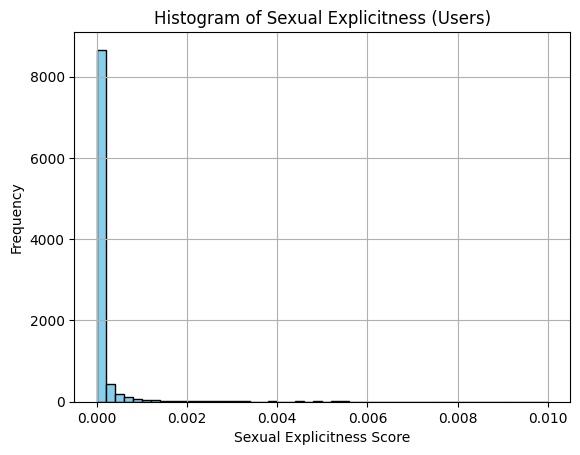

In [90]:
y_true_user = df_toxic_users['sexual_explicit']
y_true_user = y_true_user.apply(lambda x: float(x[1:-1]))

y_true_user.plot(kind='hist', bins=50, range=(0, 0.01), color='skyblue', edgecolor='black')

plt.title('Histogram of Sexual Explicitness (Users)')
plt.xlabel('Sexual Explicitness Score')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()

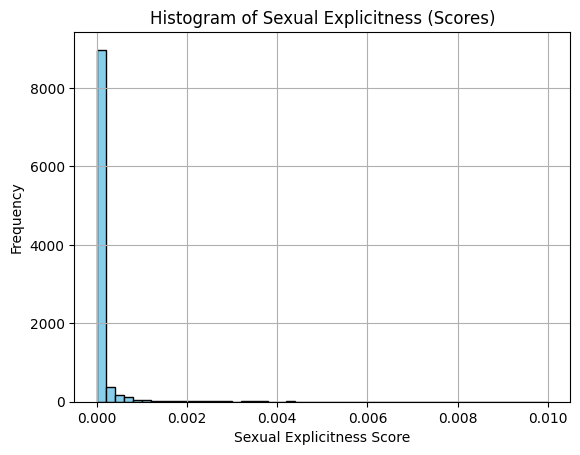

In [91]:
y_true_scores = df_toxic_chat['sexual_explicit']
y_true_scores = y_true_scores.apply(lambda x: float(x[1:-1]))

y_true_scores.plot(kind='hist', bins=50, range=(0, 0.01), color='skyblue', edgecolor='black')

plt.title('Histogram of Sexual Explicitness (Scores)')
plt.xlabel('Sexual Explicitness Score')
plt.ylabel('Frequency')
plt.grid(True)

plt.show()